Лабораторная работа №1: Оценка точности модели с непрерывной зависимой переменной

Вариант 17

ПМИ3-1, Осадина Д.Д.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(10111)
# всего наблюдений (три варианта)
n_all_options = [450, 400, 350]
n_all = n_all_options[0]   
train_percent = 0.2

# параметры распределения X
x_min, x_max = 5, 105

# генерируем X
x = np.random.uniform(x_min, x_max, n_all)

# генерируем случайный шум
mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

# отбираем наблюдения в обучающую выборку
in_train = np.random.choice(np.arange(n_all),
                           int(n_all*train_percent), replace=False)

# истинная функция взаимосвязи (ваша функция)
def y_func(x):
    return 9 + 3.5 * np.cos((x - 30) / 12)

# для графика истинной взаимосвязи
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

# фактические значения y (с шумом)
y = y_func(x) + res

# создаём векторы с данными для построения графиков
# наблюдения на обучающей выборке
x_train = x[in_train]
y_train = y[in_train]

# наблюдения на тестовой выборке
x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

# Дополнительно: можно вывести основную информацию
print(f"Всего наблюдений: {n_all}")
print(f"Обучающая выборка: {len(x_train)} наблюдений")
print(f"Тестовая выборка: {len(x_test)} наблюдений")
print(f"Диапазон X: от {x_min} до {x_max}")

Всего наблюдений: 350
Обучающая выборка: 70 наблюдений
Тестовая выборка: 280 наблюдений
Диапазон X: от 5 до 105


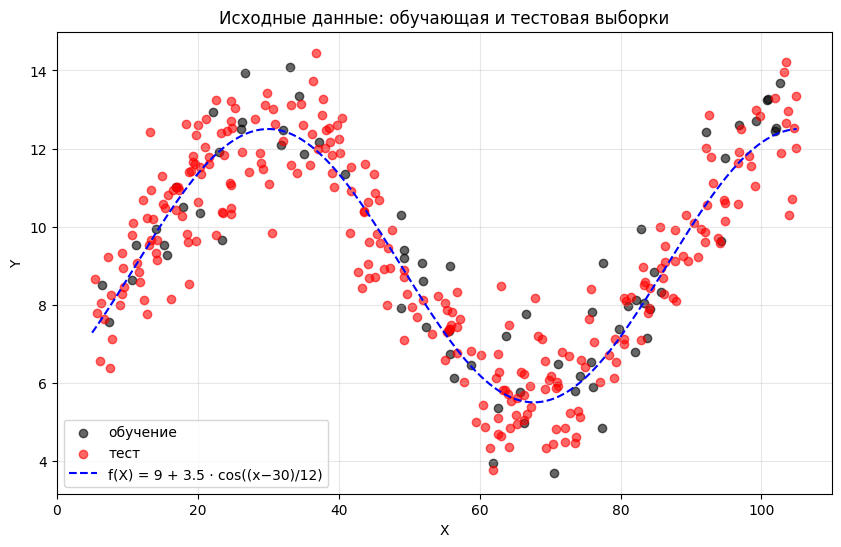

In [94]:
# график 1: исходные данные
plt.figure(figsize=(10, 6))

# обучающая выборка
plt.scatter(x_train, y_train, c='black', label='обучение', alpha=0.6)
# тестовая выборка
plt.scatter(x_test, y_test, c='red', label='тест', alpha=0.6)
# истинная функция взаимосвязи (ваша функция f(X) = 9 + 3.5 ⋅ cos((x−30)/12))
plt.plot(x_line, y_line, c='blue', linestyle='dashed', label='f(X) = 9 + 3.5 ⋅ cos((x−30)/12)')

# подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# заголовок
plt.title('Исходные данные: обучающая и тестовая выборки')
# легенда
plt.legend()
# сетка для лучшей читаемости
plt.grid(True, alpha=0.3)
plt.show()

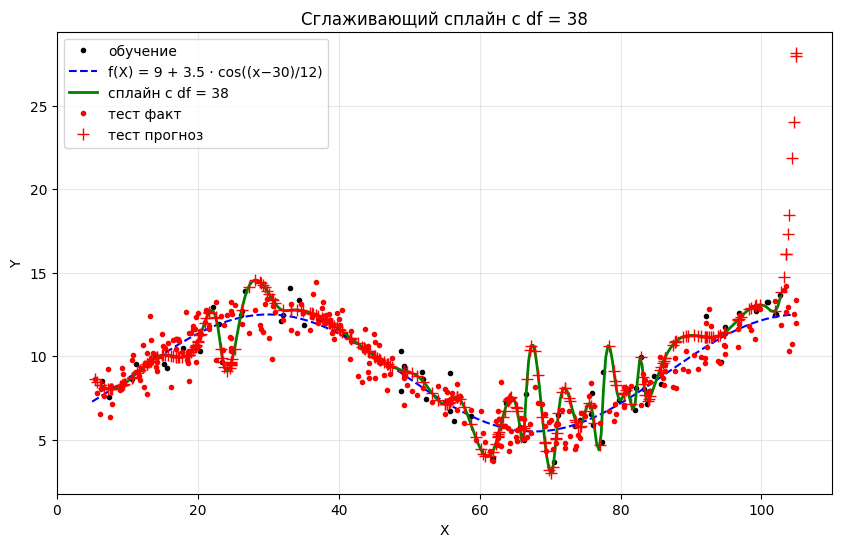

MSE на обучающей выборке: 0.4571
MSE на тестовой выборке: 4.9358


In [95]:
from scipy.interpolate import UnivariateSpline, CubicSpline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

my_df = 38

x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])

x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# Сортируем данные для сплайна
x_sorted = x_train[x_sorted_index]
y_sorted = y_train[x_sorted_index]

# Вычисляем параметр сглаживания на основе df
n = len(x_train)
s = n - my_df if my_df < n else (n - np.sqrt(2*n))

# строим сглаживающий сплайн с помощью UnivariateSpline
spline = UnivariateSpline(x_sorted, y_sorted, s=s)

# делаем прогнозы
y_hat_train = spline(x_train)
y_hat_test = spline(x_test)
y_lin_plot = spline(x_train_lin)

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='blue', ls='dashed', marker='', label='f(X) = 9 + 3.5 ⋅ cos((x−30)/12)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df, color='green', linewidth=2)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', markersize=8, label='тест прогноз')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сглаживающий сплайн с df = 38')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Вычисление MSE
MSE_fit = [sum((y_train-y_hat_train)**2)/len(y_train), sum((y_test-y_hat_test)**2)/len(y_test)]

print(f"MSE на обучающей выборке: {MSE_fit[0]:.4f}")
print(f"MSE на тестовой выборке: {MSE_fit[1]:.4f}")

In [96]:
np.around(MSE_fit, 2)

array([0.46, 4.94])

In [97]:
max_df = 40

MSE_all_dfs = [[0]*2 for i in range(2, max_df+1)]
MSE_all_dfs = pd.DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'], index=list(range(2,max_df+1)))

for i_df in range(2, max_df+1):
    s = n - i_df if i_df < n else (n - np.sqrt(2*n))
    spline = UnivariateSpline(x_sorted, y_sorted, s=s)
    y_train_hat = spline(x_train)
    y_test_hat = spline(x_test)

    MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)

C:\Users\lyaze\AppData\Local\Temp\ipykernel_12740\1442837777.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9714887460307858' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
C:\Users\lyaze\AppData\Local\Temp\ipykernel_12740\1442837777.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0427421958432836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)


In [98]:
MSE_all_dfs[MSE_all_dfs['MSE_test']==min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
3,0.957073,1.037581


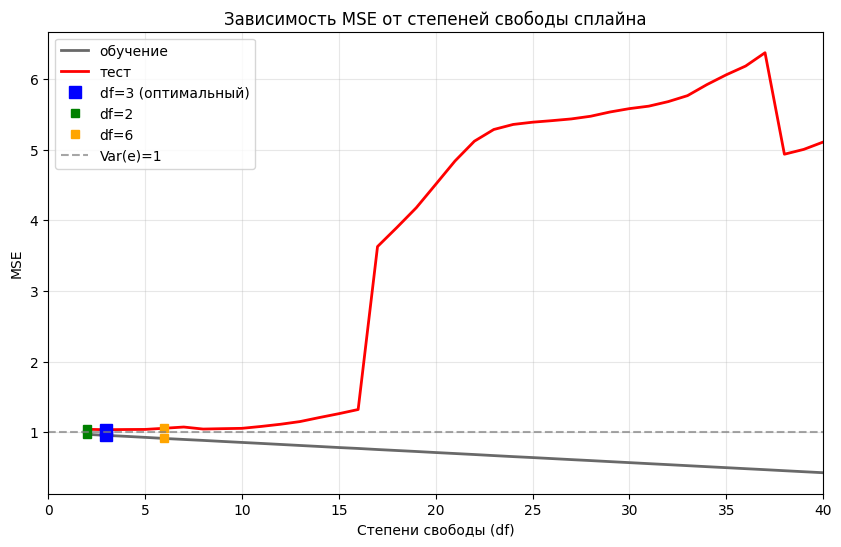

Оптимальная степень свободы: df = 3


In [100]:
plt.figure(figsize=(10, 6))
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', marker='', label='обучение', linewidth=2)
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', marker='', label='тест', linewidth=2)

optimal_df = MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])].index[0]

plt.plot([optimal_df, optimal_df], 
         [MSE_all_dfs.loc[optimal_df]['MSE_train'], MSE_all_dfs.loc[optimal_df]['MSE_test']], 
         ls='', marker='s', markersize=8, color='blue', label=f'df={optimal_df} (оптимальный)')

plt.plot([2, 2], [MSE_all_dfs.loc[2]['MSE_train'], MSE_all_dfs.loc[2]['MSE_test']], 
         ls='', marker='s', markersize=6, color='green', label='df=2')
plt.plot([6, 6], [MSE_all_dfs.loc[6]['MSE_train'], MSE_all_dfs.loc[6]['MSE_test']], 
         ls='', marker='s', markersize=6, color='orange', label='df=6')

plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1', alpha=0.7)

plt.xlabel('Степени свободы (df)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степеней свободы сплайна')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim(0, 40)
plt.show()

print(f"Оптимальная степень свободы: df = {optimal_df}")

Всего наблюдений: 450
Обучающая выборка: 90
Тестовая выборка: 360


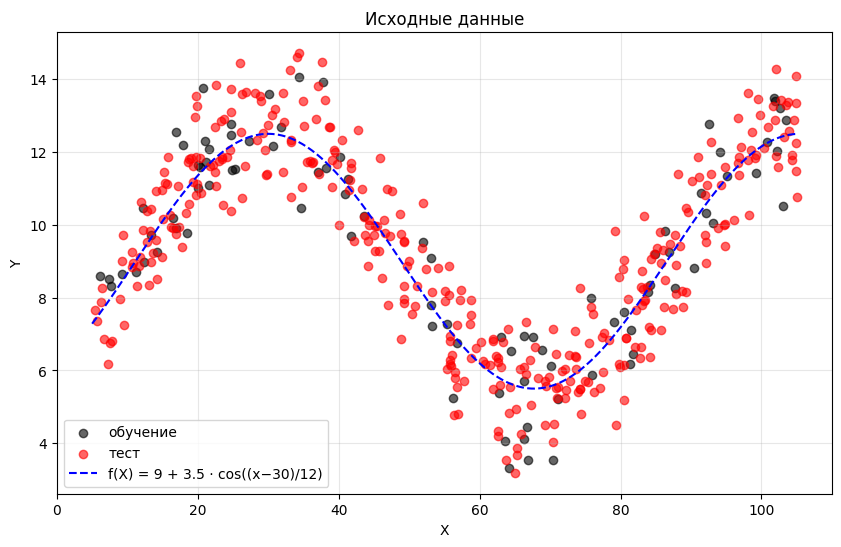

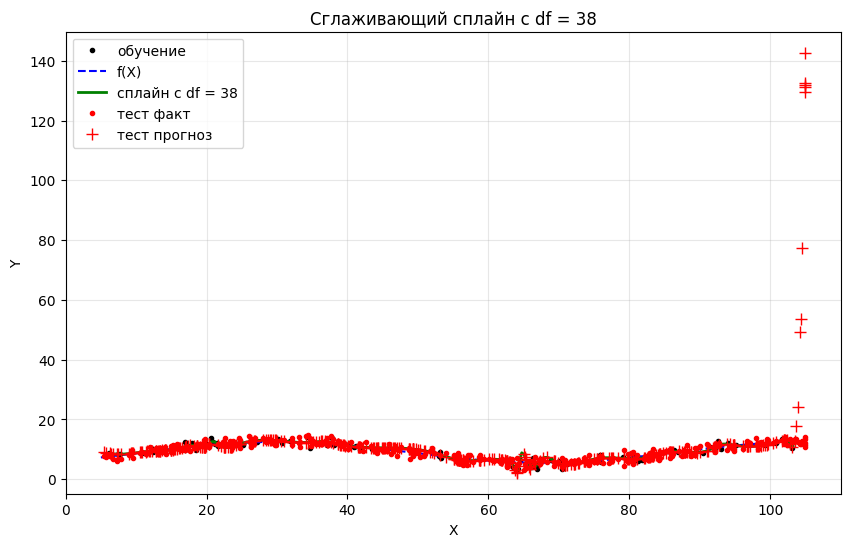

MSE на обучающей выборке: 0.5778
MSE на тестовой выборке: 227.0153
Лучший результат:
   MSE_train  MSE_test
2    0.97773  1.090107


C:\Users\lyaze\AppData\Local\Temp\ipykernel_12740\539793628.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9777302413721942' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
C:\Users\lyaze\AppData\Local\Temp\ipykernel_12740\539793628.py:97: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.090106919258348' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)


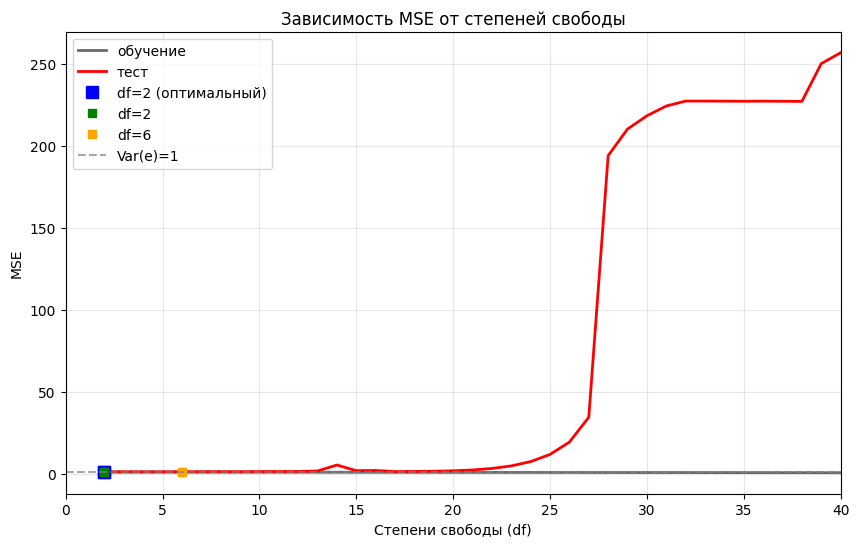

Оптимальная степень свободы: df = 2
n_all = 450: оптимальный df = 2, MSE тест = 1.0901
n_all = 400: оптимальный df = 10, MSE тест = 1.1641
n_all = 350: оптимальный df = 3, MSE тест = 1.0376


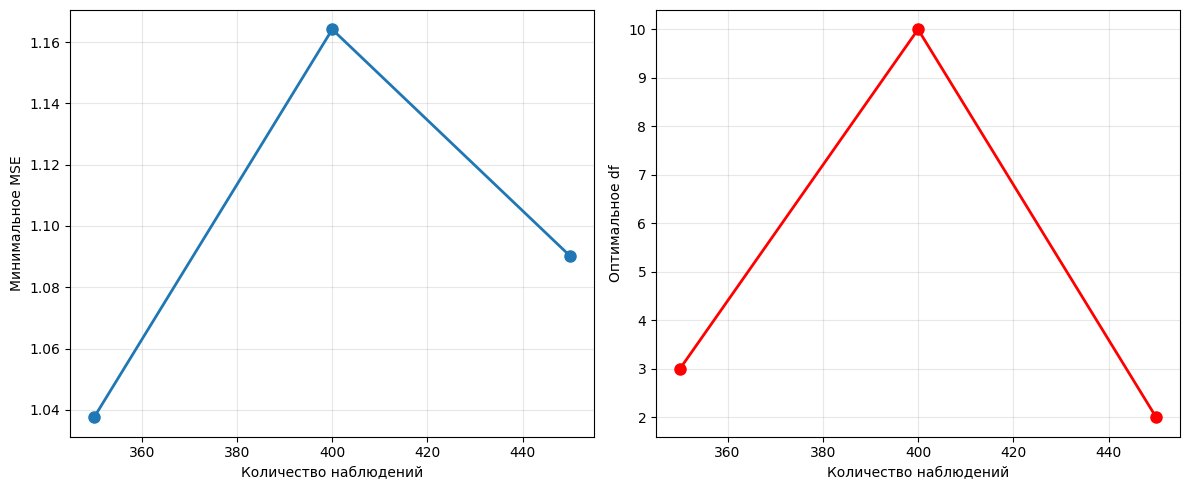

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pandas as pd

np.random.seed(10111)

n_all_options = [450, 400, 350]
n_all = n_all_options[0]
train_percent = 0.2

x_min, x_max = 5, 105

x = np.random.uniform(x_min, x_max, n_all)

mu, sigma = 0, 1
res = np.random.normal(mu, sigma, n_all)

in_train = np.random.choice(np.arange(n_all), int(n_all*train_percent), replace=False)

def y_func(x):
    return 9 + 3.5 * np.cos((x - 30) / 12)

x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

y = y_func(x) + res

x_train = x[in_train]
y_train = y[in_train]
x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)

print(f"Всего наблюдений: {n_all}")
print(f"Обучающая выборка: {len(x_train)}")
print(f"Тестовая выборка: {len(x_test)}")

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, c='black', label='обучение', alpha=0.6)
plt.scatter(x_test, y_test, c='red', label='тест', alpha=0.6)
plt.plot(x_line, y_line, c='blue', linestyle='dashed', label='f(X) = 9 + 3.5 ⋅ cos((x−30)/12)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Исходные данные')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

my_df = 38

x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])
x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

x_sorted = x_train[x_sorted_index]
y_sorted = y_train[x_sorted_index]

n = len(x_train)
s = n - my_df if my_df < n else (n - np.sqrt(2*n))

spline = UnivariateSpline(x_sorted, y_sorted, s=s)

y_hat_train = spline(x_train)
y_hat_test = spline(x_test)
y_lin_plot = spline(x_train_lin)

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='blue', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df, color='green', linewidth=2)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', markersize=8, label='тест прогноз')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сглаживающий сплайн с df = 38')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

MSE_fit = [sum((y_train-y_hat_train)**2)/len(y_train), sum((y_test-y_hat_test)**2)/len(y_test)]

print(f"MSE на обучающей выборке: {MSE_fit[0]:.4f}")
print(f"MSE на тестовой выборке: {MSE_fit[1]:.4f}")

np.around(MSE_fit, 2)

max_df = 40

MSE_all_dfs = [[0]*2 for i in range(2, max_df+1)]
MSE_all_dfs = pd.DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'], index=list(range(2,max_df+1)))

for i_df in range(2, max_df+1):
    s = n - i_df if i_df < n else (n - np.sqrt(2*n))
    spline = UnivariateSpline(x_sorted, y_sorted, s=s)
    y_train_hat = spline(x_train)
    y_test_hat = spline(x_test)
    MSE_all_dfs.loc[i_df, 'MSE_train'] = sum((y_train - y_train_hat)**2)/len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = sum((y_test - y_test_hat)**2)/len(y_test_hat)

best_result = MSE_all_dfs[MSE_all_dfs['MSE_test']==min(MSE_all_dfs['MSE_test'])]
print("Лучший результат:")
print(best_result)

plt.figure(figsize=(10, 6))
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', marker='', label='обучение', linewidth=2)
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', marker='', label='тест', linewidth=2)

optimal_df = MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])].index[0]

plt.plot([optimal_df, optimal_df], [MSE_all_dfs.loc[optimal_df]['MSE_train'], MSE_all_dfs.loc[optimal_df]['MSE_test']], ls='', marker='s', markersize=8, color='blue', label=f'df={optimal_df} (оптимальный)')
plt.plot([2, 2], [MSE_all_dfs.loc[2]['MSE_train'], MSE_all_dfs.loc[2]['MSE_test']], ls='', marker='s', markersize=6, color='green', label='df=2')
plt.plot([6, 6], [MSE_all_dfs.loc[6]['MSE_train'], MSE_all_dfs.loc[6]['MSE_test']], ls='', marker='s', markersize=6, color='orange', label='df=6')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1', alpha=0.7)
plt.xlabel('Степени свободы (df)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от степеней свободы')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim(0, 40)
plt.show()

print(f"Оптимальная степень свободы: df = {optimal_df}")

results = []
for n_all in [450, 400, 350]:
    np.random.seed(10111)
    x = np.random.uniform(x_min, x_max, n_all)
    res = np.random.normal(mu, sigma, n_all)
    in_train = np.random.choice(np.arange(n_all), int(n_all*train_percent), replace=False)
    y = y_func(x) + res
    
    x_train = x[in_train]
    y_train = y[in_train]
    x_test = np.delete(x, in_train)
    y_test = np.delete(y, in_train)
    
    x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])
    x_sorted = x_train[x_sorted_index]
    y_sorted = y_train[x_sorted_index]
    n = len(x_train)
    
    MSE_temp = []
    for i_df in range(2, max_df+1):
        s = n - i_df if i_df < n else (n - np.sqrt(2*n))
        spline = UnivariateSpline(x_sorted, y_sorted, s=s)
        y_test_hat = spline(x_test)
        MSE_temp.append(sum((y_test - y_test_hat)**2)/len(y_test_hat))
    
    optimal_df_temp = np.argmin(MSE_temp) + 2
    min_mse_test = min(MSE_temp)
    
    results.append({
        'n_all': n_all,
        'optimal_df': optimal_df_temp,
        'min_MSE_test': min_mse_test
    })
    
    print(f"n_all = {n_all}: оптимальный df = {optimal_df_temp}, MSE тест = {min_mse_test:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
n_vals = [r['n_all'] for r in results]
mse_vals = [r['min_MSE_test'] for r in results]
plt.plot(n_vals, mse_vals, 'o-', markersize=8, linewidth=2)
plt.xlabel('Количество наблюдений')
plt.ylabel('Минимальное MSE')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df_vals = [r['optimal_df'] for r in results]
plt.plot(n_vals, df_vals, 'o-', markersize=8, linewidth=2, color='red')
plt.xlabel('Количество наблюдений')
plt.ylabel('Оптимальное df')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()